**Complete Case Analysis**

In [ ]:
#Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists of discarding observations with any missing values.
#In other words, we only keep observations with data on all the variables.
#CCA works well when the data is missing completely at random.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns",None)

In [54]:
data = pd.read_csv("House_price.csv")

In [55]:
data.shape

(1460, 81)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
var_nan = [var for var in data.columns if data[var].isnull().mean() > 0]

In [8]:
var_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
data[var_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [13]:
data[var_nan].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [14]:
data_nan = data[var_nan].isnull().mean()

In [15]:
data_nan

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [16]:
data_nan = pd.DataFrame(data_nan.reset_index())

In [17]:
data_nan

,index,0
0,LotFrontage,0.177397
1,Alley,0.937671
2,MasVnrType,0.005479
3,MasVnrArea,0.005479
4,BsmtQual,0.025342
5,BsmtCond,0.025342
6,BsmtExposure,0.026027
7,BsmtFinType1,0.025342
8,BsmtFinType2,0.026027
9,Electrical,0.000685


In [18]:
data_nan.columns=["Variables","NaN_Fraction"]

In [19]:
data_nan

,Variables,NaN_Fraction
0,LotFrontage,0.177397
1,Alley,0.937671
2,MasVnrType,0.005479
3,MasVnrArea,0.005479
4,BsmtQual,0.025342
5,BsmtCond,0.025342
6,BsmtExposure,0.026027
7,BsmtFinType1,0.025342
8,BsmtFinType2,0.026027
9,Electrical,0.000685


In [21]:
data_nan.sort_values(by="NaN_Fraction",ascending=False,inplace=True)

In [22]:
data_nan

,Variables,NaN_Fraction
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


**The first 6 variables contain a lot of missing information, so we can't use CCA for the 1st 6 varibles**

In [23]:
vars_cca = [var for var in var_nan if data[var].isnull().mean() < 0.05]
vars_cca

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [24]:
len(data.dropna(subset=vars_cca)) / len(data)

0.9671232876712329

In [25]:
data_cca = data.dropna(subset=vars_cca)

data.shape, data_cca.shape

((1460, 81), (1412, 81))

<Axes: >

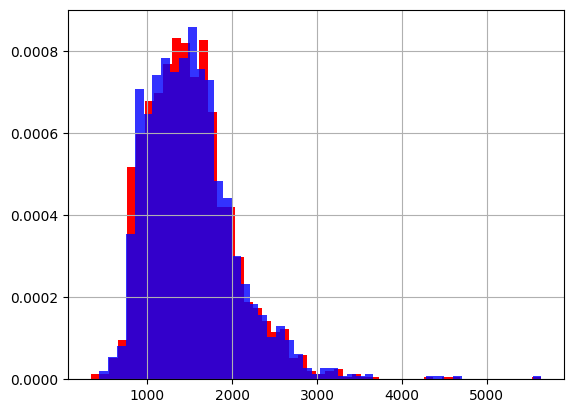

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data["GrLivArea"].hist(bins=50, ax=ax, density=True, color="red")

# Data after cca: the argument "alpha" makes the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca["GrLivArea"].hist(bins=50, ax=ax, color="blue", density=True, alpha=0.8)

<Axes: ylabel='Density'>

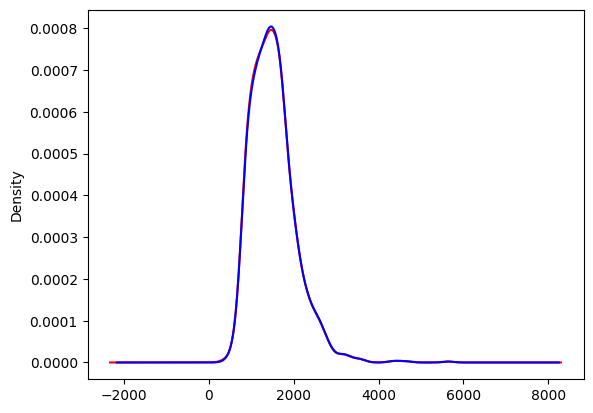

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data["GrLivArea"].plot.density(color="red")

# Data after cca.
data_cca["GrLivArea"].plot.density(color="blue")

<Axes: >

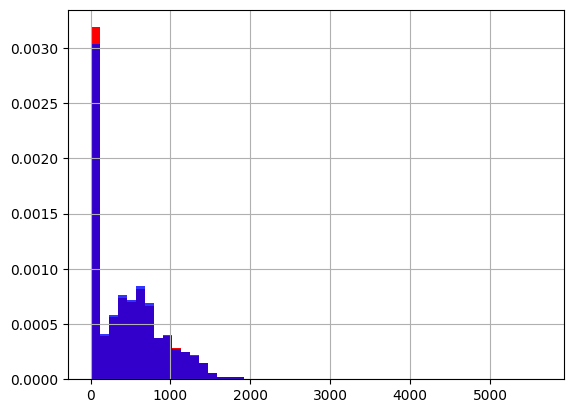

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data["BsmtFinSF1"].hist(bins=50, ax=ax, density=True, color="red")

# Data after cca: the argument "alpha" makes
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca["BsmtFinSF1"].hist(bins=50, ax=ax, color="blue", density=True, alpha=0.8)

<Axes: ylabel='Density'>

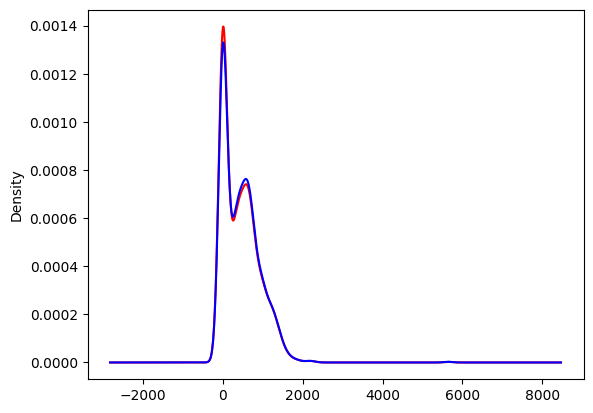

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data["BsmtFinSF1"].plot.density(color="red")

# Data after cca.
data_cca["BsmtFinSF1"].plot.density(color="blue")

In [ ]:
#As we can see from the plots, the distribution of the numerical variables in the original and complete case datasets is very similar,
#which is what we expect from CCA when data is missing at random.

In [31]:
def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts(normalize=True),
            # percentage of observations per category, cca data
            df_cca[variable].value_counts(normalize=True),
        ],
        axis=1,
    )
          # add column names
    tmp.columns = ["original", "cca"]
    return tmp

In [32]:
categorical_distribution(data, data_cca, "BsmtQual")

,original,cca
TA,0.456079,0.458924
Gd,0.434294,0.431303
Ex,0.085032,0.084986
Fa,0.024596,0.024788


In [33]:
categorical_distribution(data, data_cca, "MasVnrType")

,original,cca
None,0.595041,0.588527
BrkFace,0.306474,0.310198
Stone,0.088154,0.090652
BrkCmn,0.010331,0.010623


In [34]:
categorical_distribution(data, data_cca, "SaleCondition")

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


In [ ]:
#the distribution of houses in each of the categories is very similar in the original and complete case datasets, which is what is expected
#if the data is missing completely at random.

In [52]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [58]:
#Drop when NA in any variable
X_train_t = X_train.dropna()
X_test_t = X_test.dropna()

X_train_t.shape, X_test_t.shape

((0, 80), (0, 80))

In [59]:
#Drop when NA in certain variables
X_train_t = X_train.dropna(subset=["MasVnrArea", "BsmtQual"])
X_test_t = X_test.dropna(subset=["MasVnrArea", "BsmtQual"])

X_train_t.shape, X_test_t.shape

((993, 80), (422, 80))

In [60]:
#Drop when NA in all variables
X_train_t = X_train.dropna(how="all")
X_test_t = X_test.dropna(how="all")

X_train_t.shape, X_test_t.shape

((1022, 80), (438, 80))

In [61]:
X_train_t = X_train.dropna(thresh=0.5)
X_test_t = X_test.dropna(thresh=0.5)

X_train_t.shape, X_test_t.shape

((1022, 80), (438, 80))

**End of distribution imputation:**

In Basic imputation methods, we replaced missing data with an arbitrary value. However, choosing the value arbitrarily can be laborious and it is usually a manual job. By selecting arbitrary values at the end of the variable distribution, we can automate this procedure.

How do we select the value at the end?
If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation

If the variable is skewed, we can use the IQR proximity rule

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("Titanic-Dataset.csv", usecols=["Age", "Fare", "Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["Age", "Fare"]],
    data["Survived"],
    test_size=0.3,
    random_state=0,
)
X_train.shape, X_test.shape

((623, 2), (268, 2))

<Axes: >

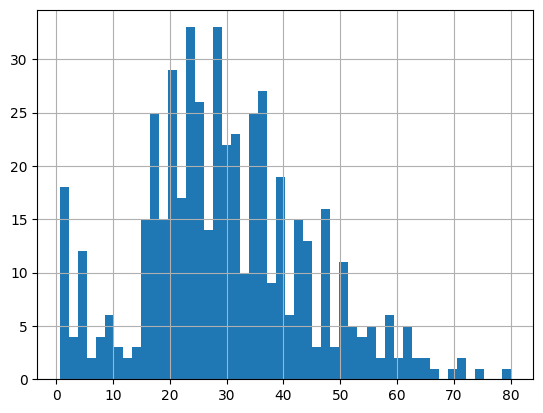

In [42]:
X_train.Age.hist(bins=50)

In [44]:
#Age looks approximately Gaussian, use the mean and std to calculate the replacement value
X_train.Age.mean() + 3 * X_train.Age.std()

73.43632005918369

In [45]:
X_train["Age_imputed"] = X_train["Age"].fillna(X_train.Age.mean() + 3 * X_train.Age.std())
X_train.head(15)

,Age,Fare,Age_imputed
857,51.0,26.5500,51.00000
52,49.0,76.7292,49.00000
386,1.0,46.9000,1.00000
124,54.0,77.2875,54.00000
578,NaN,14.4583,73.43632
549,8.0,36.7500,8.00000
118,24.0,247.5208,24.00000
12,20.0,8.0500,20.00000
157,30.0,8.0500,30.00000
127,24.0,7.1417,24.00000


In [46]:
print("Original variable variance: ", X_train["Age"].var())
print("Variance after imputation: ", X_train["Age_imputed"].var())

Original variable variance:  210.4528692463678
Variance after imputation:  466.4111899213171


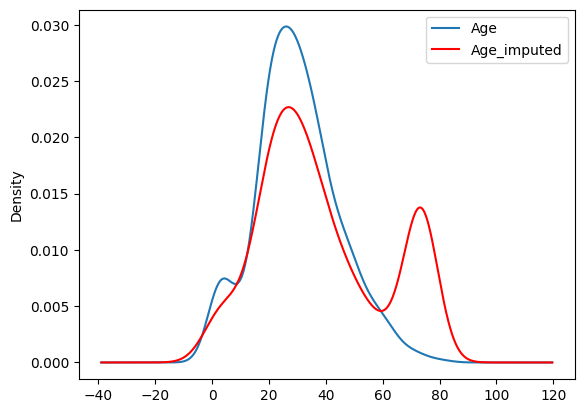

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["Age"].plot(kind="kde", ax=ax)

# imputed variable
X_train["Age_imputed"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. End of tail imputation may distort the original normal distribution if the percentage of missing data is high. Therefore, the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree-based algorithms.

In [49]:
X_train[["Fare", "Age", "Age_imputed"]].cov()

,Fare,Age,Age_imputed
Fare,2328.801583,78.468894,-7.185565
Age,78.468894,210.452869,210.452869
Age_imputed,-7.185565,210.452869,466.411190


<Axes: >

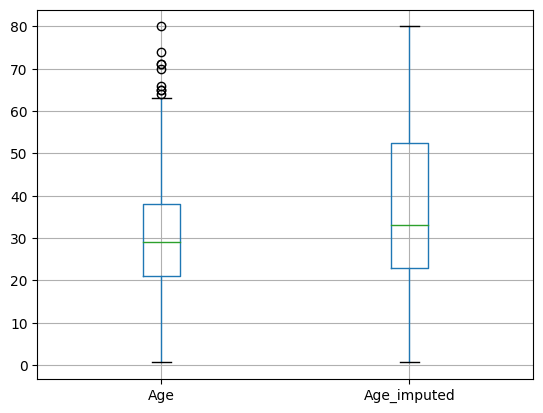

In [50]:
#Masks the outliers!!
X_train[["Age", "Age_imputed"]].boxplot()

In [62]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [63]:
data = pd.read_csv("House_price.csv", usecols=cols_to_use)
data.head()


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [64]:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [65]:
X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [66]:
vars_na = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

vars_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [67]:
imputation_dict = (X_train[vars_na].mean() + 3 * X_train[vars_na].std()).to_dict()

imputation_dict

{'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415165,
 'GarageYrBlt': 2052.9707419772235}

In [68]:
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [69]:
X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [70]:
# IQR
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

In [71]:
IQR = X_train[vars_na].quantile(0.75) - X_train[vars_na].quantile(0.25)

imputation_dict = (X_train[vars_na].quantile(0.75) + 3 * IQR).to_dict()

imputation_dict

{'LotFrontage': 146.0, 'MasVnrArea': 680.0, 'GarageYrBlt': 2121.0}

In [72]:
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [73]:
X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [74]:
cols_to_use1 = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "SalePrice",
]

**Random Sample Imputation**

In [75]:
data2 = pd.read_csv("House_price.csv", usecols=cols_to_use1)

data2.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop("SalePrice", axis=1),
    data2["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 11), (438, 11))

In [83]:
vars_na = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

vars_na

['LotFrontage', 'MasVnrArea', 'BsmtQual', 'FireplaceQu']

In [84]:
for var in vars_na:
   random_sample_train = (
        X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0))

   random_sample_test = (
        X_train[var].dropna().sample(X_test[var].isnull().sum(), random_state=0))

In [85]:
# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train[var].isnull()].index
random_sample_test.index = X_test[X_test[var].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train[var].isnull(), var] = random_sample_train
X_test.loc[X_test[var].isnull(), var] = random_sample_test

In [86]:
X_train.isnull().sum()

LotFrontage    189
OverallQual      0
MasVnrArea       5
BsmtQual        24
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FireplaceQu      0
GarageYrBlt      0
WoodDeckSF       0
dtype: int64

**Mean / Median imputation per group - pandas**

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    "LotShape",
    "OverallQual",
    "TotalBsmtSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [89]:
data = pd.read_csv("House_price.csv", usecols=cols_to_use)

data.head()

,LotFrontage,LotShape,OverallQual,MasVnrArea,TotalBsmtSF,GarageYrBlt,SalePrice
0,65.0,Reg,7,196.0,856,2003.0,208500
1,80.0,Reg,6,0.0,1262,1976.0,181500
2,68.0,IR1,7,162.0,920,2001.0,223500
3,60.0,IR1,7,0.0,756,1998.0,140000
4,84.0,IR1,8,350.0,1145,2000.0,250000


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 6), (438, 6))

In [91]:
X_train.isnull().mean()

LotFrontage    0.184932
LotShape       0.000000
OverallQual    0.000000
MasVnrArea     0.004892
TotalBsmtSF    0.000000
GarageYrBlt    0.052838
dtype: float64

In [92]:

vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [93]:
X_train.groupby("LotShape")[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].mean()

,LotFrontage,MasVnrArea,GarageYrBlt
LotShape,,,
IR1,74.158371,131.869565,1984.081325
IR2,80.550000,84.827586,1987.689655
IR3,119.200000,0.000000,1984.666667
Reg,67.185690,90.045526,1974.126456


In [95]:
X_train.groupby("LotShape")[vars_to_impute].mean()

,LotFrontage,MasVnrArea,GarageYrBlt
LotShape,,,
IR1,74.158371,131.869565,1984.081325
IR2,80.550000,84.827586,1987.689655
IR3,119.200000,0.000000,1984.666667
Reg,67.185690,90.045526,1974.126456


In [96]:
X_train["LotShape"].value_counts()

Reg    642
IR1    345
IR2     29
IR3      6
Name: LotShape, dtype: int64

In [97]:
imputation_dict = {}

for i in X_train["LotShape"].unique():

    imputation_dict[i] = (
        X_train[X_train["LotShape"] == i][vars_to_impute].mean().to_dict()
    )

imputation_dict

{'Reg': {'LotFrontage': 67.18568994889267,
  'MasVnrArea': 90.04552590266876,
  'GarageYrBlt': 1974.126455906822},
 'IR1': {'LotFrontage': 74.15837104072398,
  'MasVnrArea': 131.8695652173913,
  'GarageYrBlt': 1984.0813253012047},
 'IR2': {'LotFrontage': 80.55,
  'MasVnrArea': 84.82758620689656,
  'GarageYrBlt': 1987.6896551724137},
 'IR3': {'LotFrontage': 119.2,
  'MasVnrArea': 0.0,
  'GarageYrBlt': 1984.6666666666667}}

In [98]:
# Replace missing data

for i in imputation_dict.keys():

    X_train[X_train["LotShape"] == i] = X_train[X_train["LotShape"] == i].fillna(
        imputation_dict[i]
    )
    X_test[X_test["LotShape"] == i] = X_test[X_test["LotShape"] == i].fillna(
        imputation_dict[i]
    )

In [99]:
X_train.isnull().sum()

LotFrontage    0
LotShape       0
OverallQual    0
MasVnrArea     0
TotalBsmtSF    0
GarageYrBlt    0
dtype: int64

**USING FEATURE ENGINE**

In [101]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.5 MB/s eta 0:00:00


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.imputation import DropMissingData

In [103]:
data = pd.read_csv("House_price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["Id", "SalePrice"], axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [105]:
imputer = DropMissingData(
    variables=["Alley", "MasVnrType", "LotFrontage", "MasVnrArea"],
    missing_only=False,
)
#imputer = DropMissingData(missing_only=True)
#imputer = DropMissingData(missing_only=True,threshold=0.75)

In [106]:
imputer.fit(X_train)

DropMissingData(missing_only=False,
                variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])

In [107]:
X_train[imputer.variables].isna().sum()

Alley          960
MasVnrType       5
LotFrontage    189
MasVnrArea       5
dtype: int64

In [108]:

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [109]:
train_t[imputer.variables].isna().sum()

Alley          0
MasVnrType     0
LotFrontage    0
MasVnrArea     0
dtype: int64

In [110]:
#The "return_na_data()" method, returns a dataframe that contains the observations with NA.
# That is, the portion of the data that is dropped when we apply the transform() method.
tmp = imputer.return_na_data(X_train)
tmp.shape

(963, 79)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# from feature-engine
from feature_engine.imputation import EndTailImputer

In [112]:
cols_to_use = [
    "BsmtQual",
    "FireplaceQu",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

data = pd.read_csv("House_price.csv", usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [113]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["SalePrice"], axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [115]:
imputer = EndTailImputer(imputation_method="gaussian", tail="right")
#imputer = EndTailImputer(imputation_method="iqr", tail="left", variables=["LotFrontage", "MasVnrArea"])

In [116]:
imputer.fit(X_train)

EndTailImputer()

In [117]:
# we see that the imputer found the numerical variables

imputer.variables_

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [118]:
# here we can see the values that will be used
# to replace NA for each variable

imputer.imputer_dict_

{'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415165,
 'GarageYrBlt': 2052.9707419772235}

In [119]:
X_train[imputer.variables_].mean() + 3 * X_train[imputer.variables_].std()

LotFrontage     138.902220
MasVnrArea      648.394711
GarageYrBlt    2052.970742
dtype: float64

In [120]:
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

X_train_t.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt
64,138.90222,573.0,Gd,NaN,1998.000000
682,138.90222,0.0,Gd,Gd,1996.000000
960,50.00000,0.0,TA,NaN,2052.970742
1384,60.00000,0.0,TA,NaN,1939.000000
1100,60.00000,0.0,TA,NaN,1930.000000


In [121]:
X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [124]:
pipe = Pipeline([
    ("imputer_skewed",EndTailImputer(imputation_method="iqr",tail="right",variables=["GarageYrBlt", "MasVnrArea"])),
    ("imputer_gaussian",EndTailImputer(imputation_method="gaussian",tail="right",variables=["LotFrontage"]))
])

In [125]:
pipe.fit(X_train)

Pipeline(steps=[('imputer_skewed',
                 EndTailImputer(imputation_method='iqr',
                                variables=['GarageYrBlt', 'MasVnrArea'])),
                ('imputer_gaussian',
                 EndTailImputer(variables=['LotFrontage']))])

In [126]:
pipe.named_steps["imputer_skewed"].imputer_dict_

{'GarageYrBlt': 2121.0, 'MasVnrArea': 680.0}

In [127]:
pipe.named_steps["imputer_gaussian"].imputer_dict_

{'LotFrontage': 138.9022201686726}

In [128]:
X_train_t = pipe.transform(X_train)
X_test_t = pipe.transform(X_test)

# let's check null values are gone
X_test_t.isnull().mean()

LotFrontage    0.000000
MasVnrArea     0.000000
BsmtQual       0.029680
FireplaceQu    0.484018
GarageYrBlt    0.000000
dtype: float64

In [ ]:
#from feature_engine.imputation import RandomSampleImputer
#imputer = RandomSampleImputer(random_state=29)
#imputer.fit(X_train)
#imputer.variables_
#X_train_t = imputer.transform(X_train)
#X_test_t = imputer.transform(X_test)
#X_train_t.head()
#X_train_t[imputer.variables_].isnull().mean()